# Convolutional Neural Network Classification For Hand Poses
This script shows how to build a convolutional neural network to classify different hand poses.

In [28]:
# import necessary libraries
import torch
import torch.nn as nn
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import random, shutil
import imageio.v3 as imageio
from datetime import datetime

In [29]:
!ls

data	      hamer	 saved_images	 test_cnn.ipynb
depth_camera  README.md  save_images.py  test_save_images.ipynb


In [30]:
!ls saved_images/

0_00000001.png	1_00000011.png	2_00000021.png	3_00000031.png	4_00000041.png
0_00000002.png	1_00000012.png	2_00000022.png	3_00000032.png	4_00000042.png
0_00000003.png	1_00000013.png	2_00000023.png	3_00000033.png	4_00000043.png
0_00000004.png	1_00000014.png	2_00000024.png	3_00000034.png	4_00000044.png
0_00000005.png	1_00000015.png	2_00000025.png	3_00000035.png	4_00000045.png
0_00000006.png	1_00000016.png	2_00000026.png	3_00000036.png	4_00000046.png
0_00000007.png	1_00000017.png	2_00000027.png	3_00000037.png	4_00000047.png
0_00000008.png	1_00000018.png	2_00000028.png	3_00000038.png	4_00000048.png
0_00000009.png	1_00000019.png	2_00000029.png	3_00000039.png	4_00000049.png
0_00000010.png	1_00000020.png	2_00000030.png	3_00000040.png	4_00000050.png


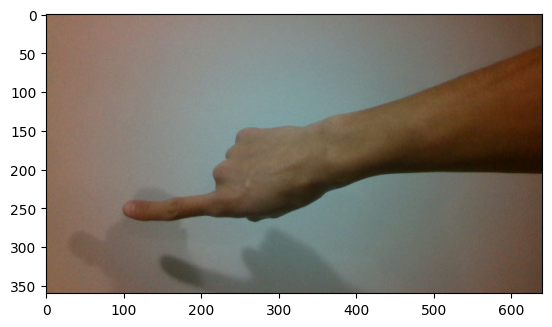

In [31]:
# verify images
plt.imshow(imageio.imread('saved_images/2_00000027.png'))
plt.show()

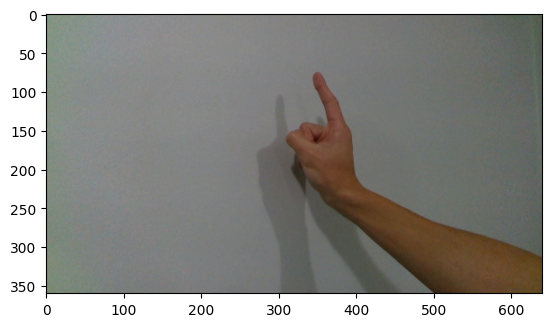

In [32]:
plt.imshow(imageio.imread('saved_images/1_00000016.png'))
plt.show()

In [33]:
# create folder environments for training and testing
os.makedirs(name="data", exist_ok=True)

os.makedirs(name="data/train", exist_ok=True)
os.makedirs(name="data/test", exist_ok=True)

os.makedirs(name="data/train/fist", exist_ok=True)      # label 0 for training
os.makedirs(name="data/train/up", exist_ok=True)        # label 1 for training
os.makedirs(name="data/train/left", exist_ok=True)      # label 2 for training
os.makedirs(name="data/train/down", exist_ok=True)      # label 3 for training
os.makedirs(name="data/train/right", exist_ok=True)     # label 4 for training

os.makedirs(name="data/test/fist", exist_ok=True)       # label 0 for testing
os.makedirs(name="data/test/up", exist_ok=True)         # label 1 for testing
os.makedirs(name="data/test/left", exist_ok=True)       # label 2 for testing
os.makedirs(name="data/test/down", exist_ok=True)       # label 3 for testing
os.makedirs(name="data/test/right", exist_ok=True)      # label 4 for testing

In [34]:
# randomly move image files from train to test folder
def random_file_move(label_name: str, ratio=0.2):
    # label_name: fist, up, left, down, right
    src = f"data/train/{label_name}/"
    dst = f"data/test/{label_name}/"
    
    # check whether the ratio between train and test image files
    files_src = os.listdir(src)
    files_dst = os.listdir(dst)
    n_files_to_move = round((len(files_src) + len(files_dst)) * ratio)
    if n_files_to_move <= len(files_dst):
        # if the number of dst files is greater than or equal to the ratio of the number of total files
        # consider the files are already moved from train to test folder
        return
    # else move the files to meet the ratio
    n_files_to_move -= len(files_dst)
    for file_name in random.sample(files_src, n_files_to_move):
        shutil.move(os.path.join(src, file_name), dst)

random_file_move("fist")
random_file_move("up")
random_file_move("left")
random_file_move("down")
random_file_move("right")